# Python Machine Learning Model for Salary Dataset

## First Model is made using supervised learning model
## Then deployment is done using flask server


Regression is used to find real values<br>
It gives a general formula for the dataset<br>
In this we calculate how much the difference in between the predicted value and the actual value for the whole dataset<br>
Difference between actual value and predicted value is called cost function<br>
Error is calculated for entire dataset using this cost function

# Importing Libraries


In [13]:
#To read CSV file
import pandas as pd
# For importing algorithm
from sklearn.linear_model import LinearRegression
# For splitting between training and testing
from sklearn.model_selection import train_test_split
# Importing accuracy score and mean_squared_error
from sklearn.metrics import mean_squared_error, accuracy_score,mean_absolute_error
# For plotting
import matplotlib.pyplot as plt
# For Saving model as pkl file
import pickle

Implementing Simple Linear Regression for salary dataset<br>
This dataset contains the years of experience and Salary of employees<br>
First column dosen't have any significance in data (Only used for Index)<br>
We can remove that<br>
To remove that we have two options

Method 1-By giving usecols arguments and only using required columns

In [14]:
data=pd.read_csv("Salary_dataset.csv",usecols=['YearsExperience','Salary'])
print(data)

    YearsExperience    Salary
0               1.2   39344.0
1               1.4   46206.0
2               1.6   37732.0
3               2.1   43526.0
4               2.3   39892.0
5               3.0   56643.0
6               3.1   60151.0
7               3.3   54446.0
8               3.3   64446.0
9               3.8   57190.0
10              4.0   63219.0
11              4.1   55795.0
12              4.1   56958.0
13              4.2   57082.0
14              4.6   61112.0
15              5.0   67939.0
16              5.2   66030.0
17              5.4   83089.0
18              6.0   81364.0
19              6.1   93941.0
20              6.9   91739.0
21              7.2   98274.0
22              8.0  101303.0
23              8.3  113813.0
24              8.8  109432.0
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0


Method 2-By using the index_col and setting it to 0 so that it doesn't take index

In [15]:
data=pd.read_csv("Salary_dataset.csv",index_col=0)
print(data)

    YearsExperience    Salary
0               1.2   39344.0
1               1.4   46206.0
2               1.6   37732.0
3               2.1   43526.0
4               2.3   39892.0
5               3.0   56643.0
6               3.1   60151.0
7               3.3   54446.0
8               3.3   64446.0
9               3.8   57190.0
10              4.0   63219.0
11              4.1   55795.0
12              4.1   56958.0
13              4.2   57082.0
14              4.6   61112.0
15              5.0   67939.0
16              5.2   66030.0
17              5.4   83089.0
18              6.0   81364.0
19              6.1   93941.0
20              6.9   91739.0
21              7.2   98274.0
22              8.0  101303.0
23              8.3  113813.0
24              8.8  109432.0
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0


Preprocessing<br>
Splitting between Input and Output

In [16]:
X,Y=data['YearsExperience'].to_numpy().reshape(-1,1),data['Salary'].to_numpy().reshape(-1,1)
print("Input is:\n",X)
print("\nOutput is:\n",Y)
print("Shape of Input data is:",X,"Shape of Output data is:",Y)

Input is:
 [[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]

Output is:
 [[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 63219.]
 [ 55795.]
 [ 56958.]
 [ 57082.]
 [ 61112.]
 [ 67939.]
 [ 66030.]
 [ 83089.]
 [ 81364.]
 [ 93941.]
 [ 91739.]
 [ 98274.]
 [101303.]
 [113813.]
 [109432.]
 [105583.]
 [116970.]
 [112636.]
 [122392.]
 [121873.]]
Shape of Input data is: [[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]] Shape of Output data is: [[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 6

Splitting into training and testing data<br>
we can do this directly as dataset is small instead of using train test split

In [17]:
x_train=X[:-5]
x_test=X[-5:]
y_train=Y[:-5]
y_test=Y[-5:]
print("Training data is:\n",x_train)
print("\nTesting data is:\n",y_train)
print("Shape of Training data is:",x_train.shape,"Shape of Testing data is:",y_train.shape)

Training data is:
 [[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]
 [3. ]
 [3.1]
 [3.3]
 [3.3]
 [3.8]
 [4. ]
 [4.1]
 [4.1]
 [4.2]
 [4.6]
 [5. ]
 [5.2]
 [5.4]
 [6. ]
 [6.1]
 [6.9]
 [7.2]
 [8. ]
 [8.3]
 [8.8]]

Testing data is:
 [[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 63219.]
 [ 55795.]
 [ 56958.]
 [ 57082.]
 [ 61112.]
 [ 67939.]
 [ 66030.]
 [ 83089.]
 [ 81364.]
 [ 93941.]
 [ 91739.]
 [ 98274.]
 [101303.]
 [113813.]
 [109432.]]
Shape of Training data is: (25, 1) Shape of Testing data is: (25, 1)


Choosing algorithm

In [18]:
reg=LinearRegression()
# Training data
reg.fit(x_train,y_train)

LinearRegression()

Evaluating model

In [19]:
print("Training Accuracy score is:",reg.score(x_train,y_train)*100)
# Checking predicted values
predict=reg.predict(x_test)
print("Predicted values are:\n")
print(predict)
# Checking predicted value for given value
print("Predicted value for 1.5 is:\n",reg.predict([[1.5]]))

Training Accuracy score is: 92.98889340527403
Predicted values are:

[[113773.84320812]
 [118768.07936621]
 [119766.92659783]
 [126758.85721916]
 [128756.55168239]]
Predicted value for 1.5 is:
 [[37861.45360513]]


print(accuracy_score(predict,y_test))-Doesn't work as accuracy score doesn't take array

Checking for Error

In [20]:
print("Mean Squared error is:",mean_squared_error(y_test,predict))
print("Mean Absolute error is:",mean_absolute_error(y_test,predict))

Mean Squared error is: 37525168.34948919
Mean Absolute error is: 5674.051614740992


Plotting<br>
We can see the points are much away from the line<br>
Cost function is very high<br>
This is why absolute and mean squared error is so high

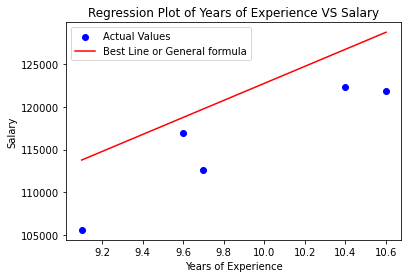

In [21]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,predict,color="red")
plt.title("Regression Plot of Years of Experience VS Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend(['Actual Values','Best Line or General formula'])
plt.show()

Saving model to disk

In [22]:
pickle.dump(reg, open('model.pkl','wb'))
print("Model Successfully saved to disk with extention .pkl(pickle file)")

Loading model to compare the results

In [23]:
model = pickle.load(open('model.pkl','rb'))
print("Predicted value for 9 years of experience using saved model is:",model.predict([[9]]))

Predicted value for 9 years of experience using saved model is: [[112774.9959765]]
